# Titanic Dataset Analysis and Basic Classification

This notebook happens to be my first machine learning application.
### References


1. https://www.kaggle.com/ash316/eda-to-prediction-dietanic/log
    I followed this notebook by Ashwani Saini (learnt a lot about catplots, counplots and groupy functions)
2. https://learn.dphi.tech/
    Being a part of this bootcamp guided me to this wonderful transition
   
### Purpose
The purpose of this notebook is to establish a good practice of different methods available in pandas, matplotlib, seaborn and oter such libraries. So there might be some over redundant plots or tabulations which are just to establish the learnings. 

In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Load and study data

In [136]:
#load directly from a git repo
titanic_data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

#gives a list of the columns in the dataframe
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Types of data
#### Nominal
1. Survived
2. Pclass
3. Sex
4. Name
5. SibSp
6. Parch
7. Embarked

#### Continuous
1. Age
2. Fare

#### Unsure
1. PassengerId
2. Ticket
3. Cabin

In [137]:
#create a copy so that you dont end up compromising the source data
data = titanic_data.copy()

In [138]:
#.info() gives you the datatypes of all columns and the number of non null rows in them
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [139]:
#gives you the count of null values in each column
# print(data.isnull().sum())

#gives you the percent of null values in each column
print((data.isnull().sum())*100./len(data))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


#### Note on missing values
The rule of thumb we are following is we can drop columns with null values greater than 20%. But before we do this, we need to understand why we have that null value in the first place and if we could still use the remaining data to extract some information that could aid other columns. 

Like in this case for example, the column Age has 19.86% missing values. There are two ways we could use the age column.
1. Impute using the median age and fill the column without disturbing the distribution.
2. We could use the Name column, which has the salutations which gives insight to what the age of the person might be. For instance if the salutation is 'master' it means its a child and it makes no sense in gving it a median age.

In [140]:
#gives a satistical undersangin of how the data in each column is
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


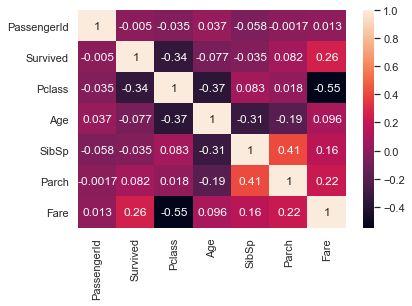

In [141]:
#can pick one style from the list presented above
sns.set_style('whitegrid')
sns.set_context('poster')
sns.set(font_scale=1)
#gives a firsthand understanding how the features correlates with each other.
sns.heatmap(data.corr(),annot=True)

In [142]:
# from matplotlib import style
# style.available

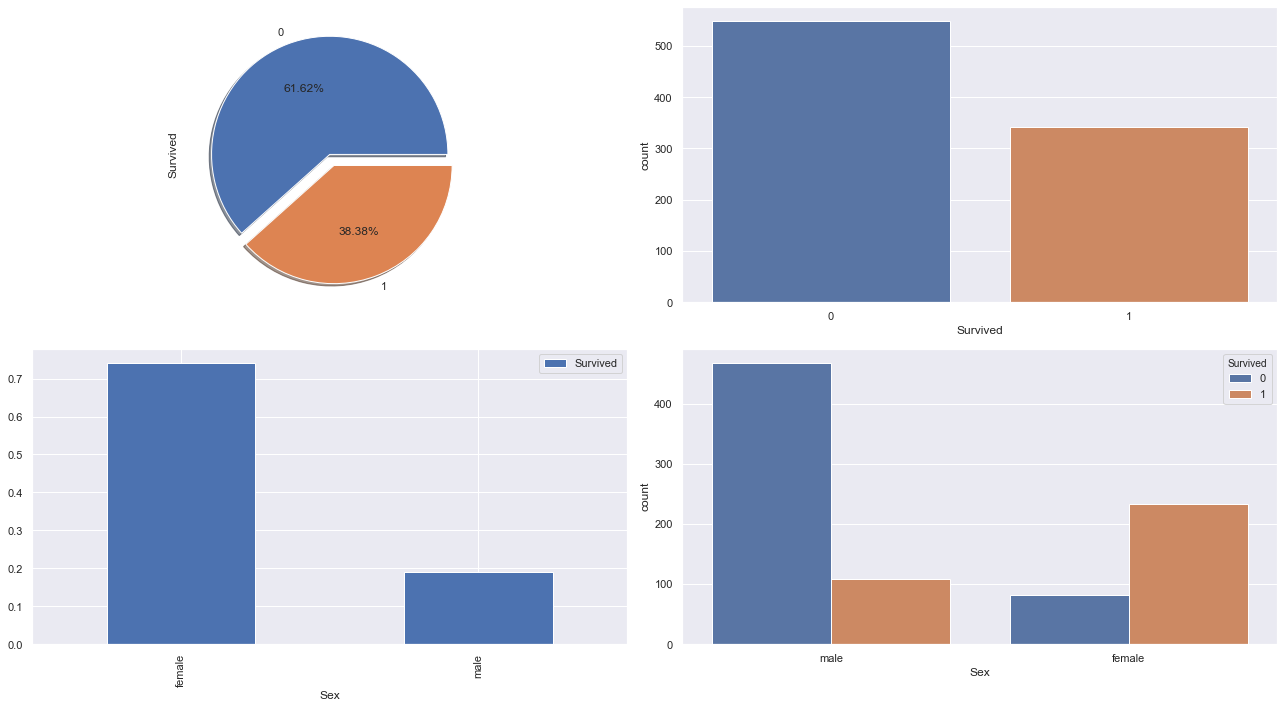

In [143]:
#Create a figure, inside which you will have  4 subplots; 2 rows, 2 columns
fig,ax = plt.subplots(2,2,figsize=(18,10))

#Depict a pie chart and countplot to visualize the dead vs survived 
data.Survived.value_counts().plot.pie(ax=ax[0,0],autopct="%1.2f%%",explode=[0,0.1],shadow=True)
sns.countplot('Survived',data=data,ax=ax[0,1])

#Charts to show survival based on gender
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[1,0])
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1,1])

#this is used to evenly space out all titles, labels and ticks within the figure in a legible manner
fig.tight_layout()

Only **38%** of the passengers survived this disaster.
It can be clearly seen that the **survival rate of women is higher than men**

In [144]:
#A tabular way to see the numerical distribution of survival of passengers based on gender
pd.crosstab(data.Sex,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


It can be clearly seen that almost **75% of women** who had travelled survived, whereas roughly only **20% of men** who travelled survived
Now let us try to add in one more variable, **Pclass** to see how it affected the survival chances

In [145]:
#A tabular way to see the numerical distribution of survival of passengers
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

This shows a **clear advantage of being in 1st class**
1. Close to **62%** of passengers in 1st class survived, whereas only about **20%** from 3rd class survived
2. Going further, almost **94%** women survived from class 1 and calss 2, but only **50%** women from 3rd class survived
3. The male passengers survival is less amongst all the classes, althogh the men in 2nd and 3rd class survived only about **15%** and **13%** respectively, whereas men in 1st class survived about **36%**

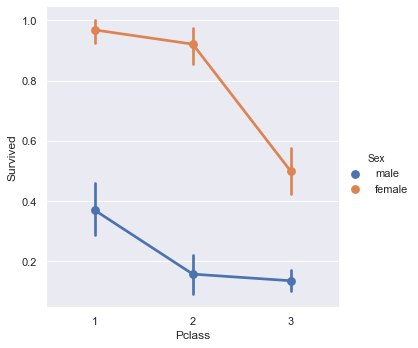

In [146]:
#catplt helps you to visualize categorical against other nominal values. Used 'hue' to show the difference amongst the  gender 
sns.catplot('Pclass','Survived',hue='Sex',data=data,kind='point')
fig.tight_layout()

Now that we have established that there is a strong relation between, **Sex, Pclass and Survived**, let us add one more variable **Embarked** into the mix.

In [147]:
pd.crosstab([data.Pclass,data.Embarked],[data.Survived,data.Sex],margins=True).style.background_gradient(cmap='summer_r')

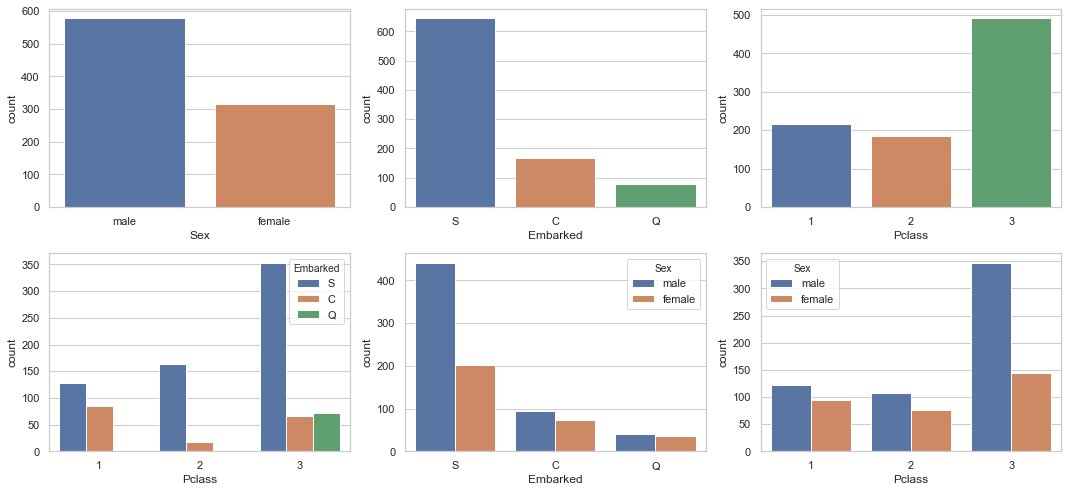

In [148]:
sns.set_style('whitegrid')

fig,ax=plt.subplots(2,3,figsize=(15,7))

sns.countplot('Sex',data=data,ax=ax[(0,0)])
sns.countplot('Pclass',hue='Embarked',data=data,ax=ax[1,0])

sns.countplot('Embarked',data=data,ax=ax[0,1])
sns.countplot('Pclass',data=data,ax=ax[0,2])

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[1,1])
sns.countplot('Pclass',hue='Sex',data=data,ax=ax[1,2])
plt.tight_layout()

Maximum passengers boarded from **port S** and it also happened to be the port where most passengers travelling by 3rd class boarded. **No passenger boarded 1st class** in port **Q**

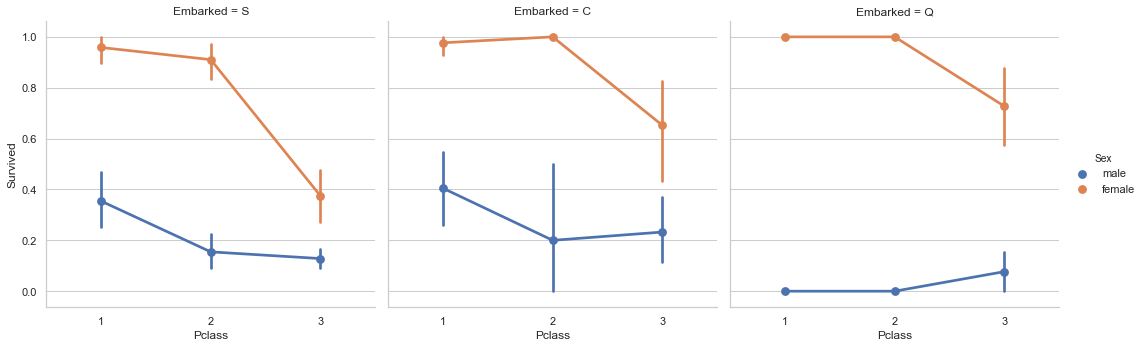

In [149]:
sns.catplot('Pclass','Survived',col='Embarked',hue='Sex',data=data,kind='point');

In [150]:
pd.crosstab(data['Embarked'],data['Survived']).style.background_gradient(cmap="summer_r")

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


It can be seen from the above plots and tabulations for some reason people who **embarked on Port C seems to have a slightly better survival chances**. 

In [151]:
#impute the two missing values with the mode of the data
data['Embarked'].fillna('S',inplace=True)

In [152]:
#the cabin data is almost 80% not available, so we can go ahead drop it
data.drop('Cabin',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Let us now consider how being a **group of family and being alone factors in the survival chances**. To start with we shall tabulate the survivals of people based on whether they came with any sibling/spouse 

In [153]:
pd.crosstab(data.SibSp,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


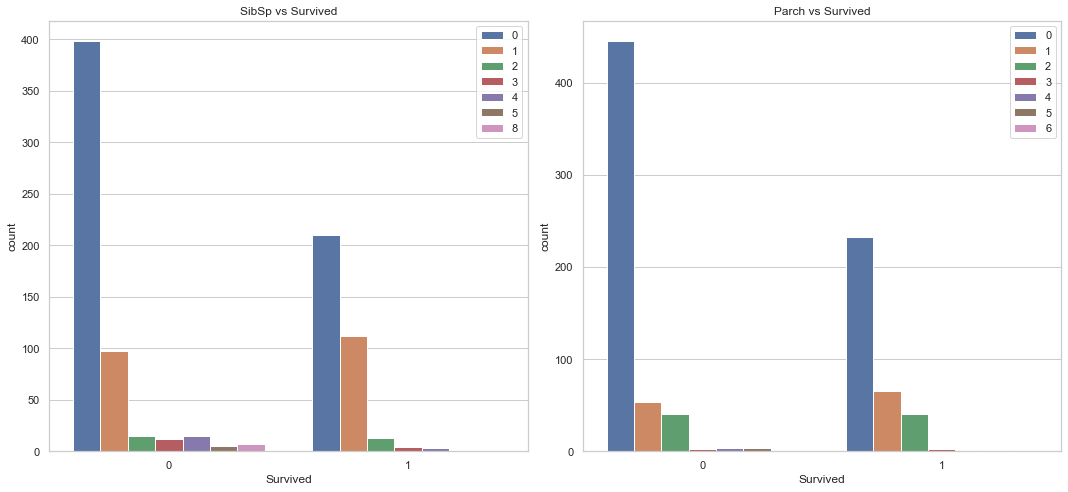

In [154]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].set_title('SibSp vs Survived')
sns.countplot('Survived',hue='SibSp',data=data,ax=ax[0])
ax[0].legend(loc='upper right')
ax[1].set_title('Parch vs Survived')
sns.countplot('Survived',hue='Parch',data=data,ax=ax[1])
ax[1].legend(loc='upper right')
plt.tight_layout()

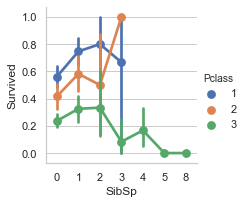

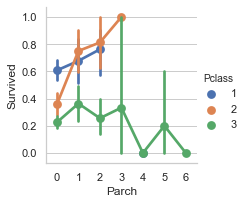

In [155]:

sns.catplot('SibSp','Survived',data=data,hue='Pclass',kind='point',height=3)
sns.catplot('Parch','Survived',data=data,hue='Pclass',kind='point',height=3)

# plt.tight_layout()

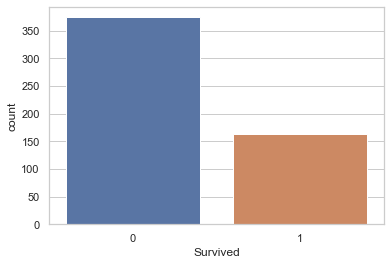

In [156]:
c5 = (data['SibSp']==0)
c6 =  (data['Parch']==0)
soloDf=data[(c5&c6)]
# sns.countplot('Sex',hue='Survived',data=soloDf);
sns.countplot('Survived',data=soloDf);


From the above plots we can see that being alone has a low chance of survival (close to over **50%** of people who are alone **dont survive**). At the same time being a big group doesnt help with the survival rate either.

In [157]:
# sns.catplot('Pclass','Survived',col='Embarked',hue='Sex',data=soloDf,kind='point')

Like we discussed earlier, we could tap into the names of the passengers to make an educated guess as to what their age could be instead of imputing with a median value

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
------------------------------
count    891.000000
mean      29.798957
std       13.280274
min        0.420000
25%       21.860000
50%       30.000000
75%       35.981818
max       80.000000
Name: Age, dtype: float64


Text(0.5, 1.0, 'Dead')

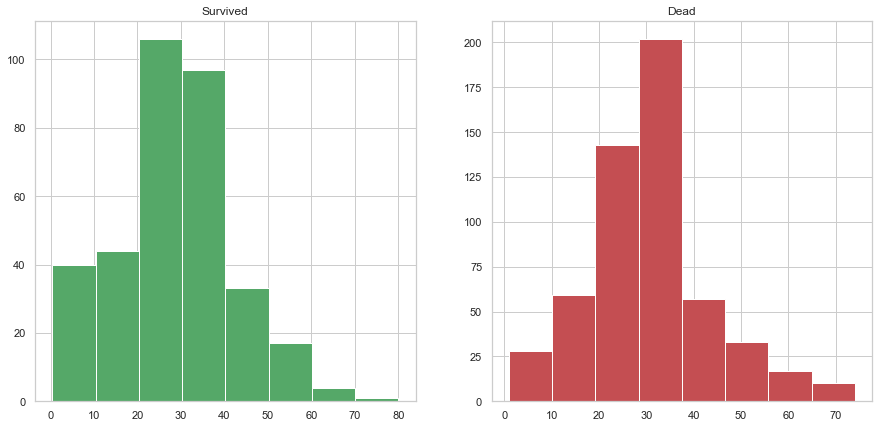

In [158]:
data['Initial']=0
#extract all the salutations from the names
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
    
#replace them with a generic gender/age specific salutations    
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
salutations=data['Initial'].unique().tolist()
# type(salutations)

#calculate the mean of each salutation groups
meanAge = dict(data.groupby('Initial')['Age'].mean())

print(data.Age.describe())
c1 = data['Initial']=='Miss'
c2 = data["Age"].isnull()

for x in range(len(salutations)):
  c1 = data['Initial']==salutations[x]
  data.loc[(c1&c2),'Age'] = meanAge[salutations[x]]
    
print("-"*30)
print(data.Age.describe())


fig,ax = plt.subplots(1,2,figsize=(15,7))
c3=(data.Survived==1)
c4=(data.Survived==0)
safeDf = data[c3]
deadDf = data[c4]
ax[0].hist(safeDf.Age,bins=8,color='g')
ax[0].set_title('Survived')
ax[1].hist(deadDf.Age,bins=8,color='r')
# sns.distplot(deadDf.Age,bins=8,ax=ax[1])
ax[1].set_title('Dead')

Age group between **20-40** lost their lives the most, the elderly and the children had a better survival rates

In [159]:
# sns.catplot('Pclass','Survived',col='Initial',data=data,kind='point');
# sns.catplot('Embarked','Survived',col='Pclass',data=data,kind='point');

In [160]:
def binConverter(featureList,n):
    for k in featureList:
        diff = data[k].max()-data[k].min()
        cRange=diff/float(n)
        l = data[k].min()
        llim = l
        ulim = llim+cRange
        newName=k+'_band'
        data[newName]=0
        for i in range(10):
            data.loc[((data[k]>=llim)&(data[k]<ulim)),newName]=i
            llim=ulim
            ulim+=cRange
            
#convert age group to bins
binConverter(['Age'],5)

In [161]:
pd.crosstab(data.Age_band,data.Survived).style.background_gradient(cmap="summer_r")

Survived,0,1
Age_band,,
0,47,57
1,232,150
2,221,104
3,39,30
4,10,0
5,0,1


### Model Preparation

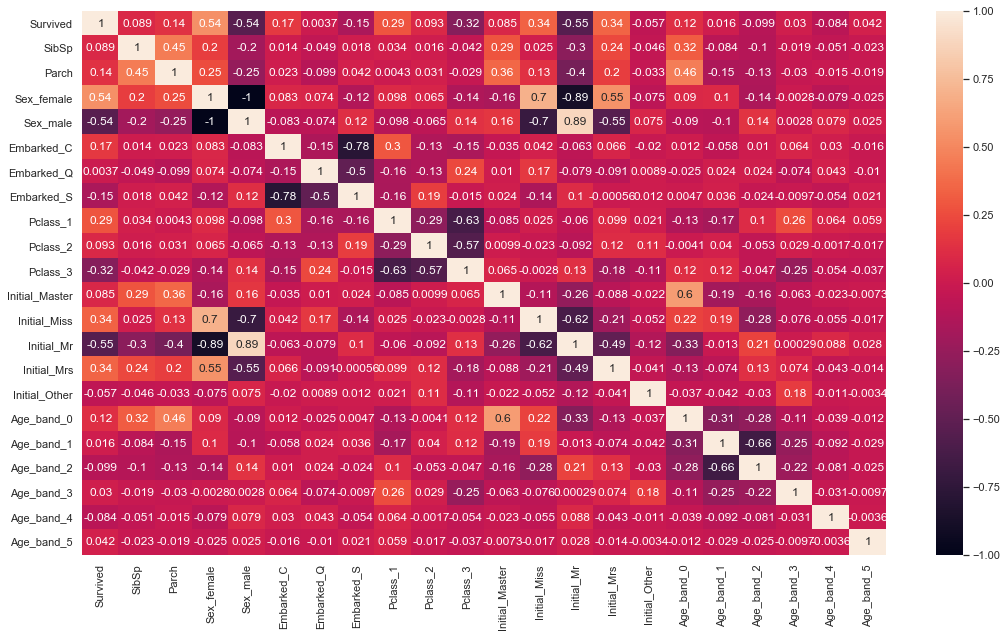

In [162]:
featuresToConv = ['Sex','Embarked','Pclass','Initial','Age_band']
# featuresToConv = ['Sex','Embarked','Pclass','Age_band']
#one hot encoding the the above features to feed into the model
data = pd.get_dummies(data,columns=featuresToConv)

featuresToDrop = ['Name','Ticket','Fare','PassengerId','Age']
data.drop(featuresToDrop,axis=1,inplace=True)
fig = plt.figure(figsize=(18,10))
sns.heatmap(data.corr(method='spearman'),annot=True)


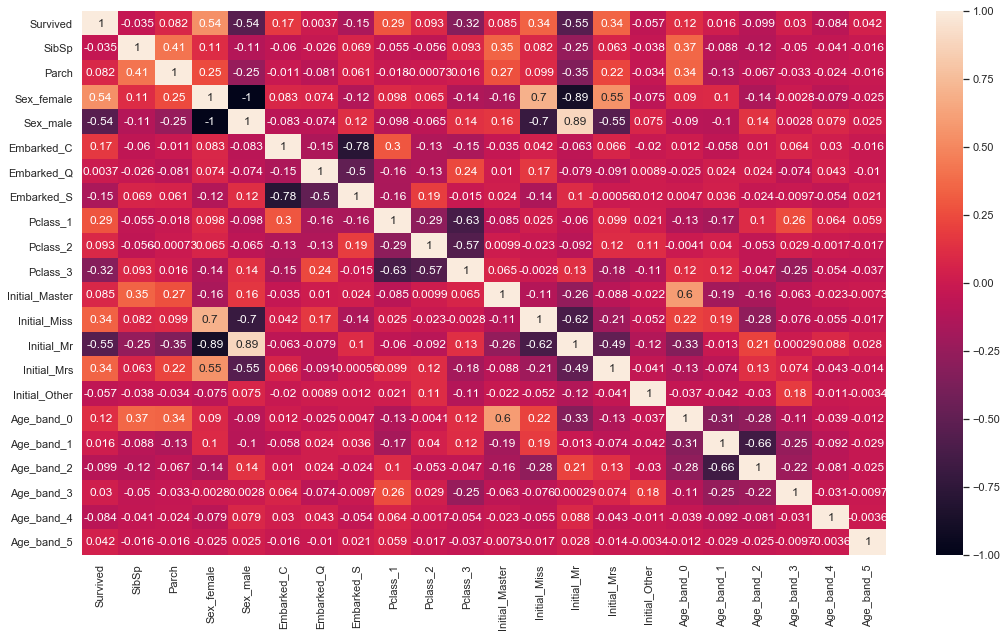

In [163]:
fig = plt.figure(figsize=(18,10))
sns.heatmap(data.corr(method='pearson'),annot=True)

In [164]:
X = data.drop('Survived',axis=1)
y=data.Survived
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=21)

### DecisionTreeClassifier

In [165]:
from sklearn.tree import DecisionTreeClassifier

#create an instance of the classifier model
classFit=DecisionTreeClassifier(max_depth=4) #using max_depth=3 to avoid overfitting

#train the model
classFit.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [166]:
#get the prediction outputs
predicted_train = classFit.predict(X_train)

predicted_test = classFit.predict(X_test)


In [167]:
# from sklearn import tree

# fn = X.columns
# cn = 'Survived'

# tree.plot_tree(classFit,
#                feature_names=fn,
#                class_names=cn,
#                filled=True)


#### DecisionTreeClassifier Metrics

In [168]:
from sklearn.metrics import accuracy_score

print('training: ',accuracy_score(y_train,predicted_train))
print('testing: ',accuracy_score(y_test,predicted_test))

from sklearn.metrics import matthews_corrcoef,f1_score
mCorr = matthews_corrcoef(y_test,predicted_test)
f1Score = f1_score(y_test,predicted_test)
print("Matthews Correlation coefficient: ",mCorr)
print("F1 Correlation coefficient: ",f1Score)

training:  0.8378812199036918
testing:  0.8171641791044776
Matthews Correlation coefficient:  0.6196209830759009
F1 Correlation coefficient:  0.7322404371584699


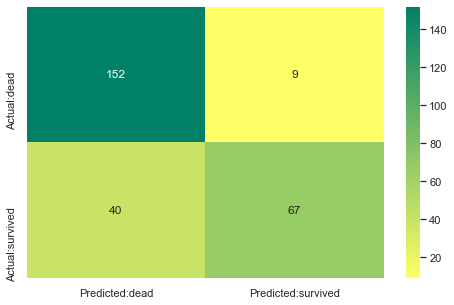

In [169]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_test)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:dead','Predicted:survived'],index=['Actual:dead','Actual:survived'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="summer_r")

In [170]:
trueNegative=cm[0,0]
truePositive=cm[1,1]
falseNegative=cm[1,0]
falsePositive=cm[0,1]
"""
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
.ravel() converts the 2D array into a correct sequence of a 1D array (like,,[(0,0),(0,1),(1,0)(1,1)])
"""
sensitivity = truePositive/float((truePositive+falseNegative)) #also called as recall
"""
from sklearn.metrics import recall_score

sensitivity = recall_score(y_test,pred_test)

"""
specificity = trueNegative/float((trueNegative+falsePositive))

print("Sensitivity of model: ", sensitivity)
print("Specificity of model: ", specificity)

res = [accuracy_score(y_test,predicted_test),sensitivity,specificity]

from sklearn.metrics import r2_score
print('R2_test: ',metrics.r2_score(y_test,predicted_test))

Sensitivity of model:  0.6261682242990654
Specificity of model:  0.9440993788819876
R2_test:  0.23770824867939866


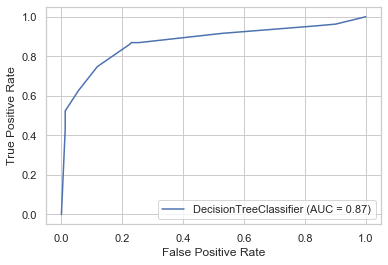

In [171]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(classFit,X_test,y_test)

### Logistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression

logFit = LogisticRegression()

logFit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:

pred_train_Lr = logFit.predict(X_train)
pred_test_Lr = logFit.predict(X_test)

#### Logistic Regression Metrics


In [174]:
print('training: ',accuracy_score(y_train,pred_train_Lr))
print('testing: ',accuracy_score(y_test,pred_test_Lr))
mCorr_Lr = matthews_corrcoef(y_test,pred_test_Lr)
f1Score_Lr = f1_score(y_test,pred_test_Lr)
print("Matthews Correlation coefficient: ",mCorr_Lr)
print("F1 Correlation coefficient: ",f1Score_Lr)

training:  0.8362760834670947
testing:  0.832089552238806
Matthews Correlation coefficient:  0.646592125398083
F1 Correlation coefficient:  0.7804878048780487


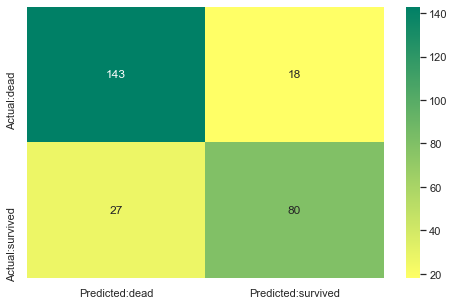

In [175]:
cm_Lr = confusion_matrix(y_test,pred_test_Lr)
conf_matrix=pd.DataFrame(data=cm_Lr,columns=['Predicted:dead','Predicted:survived'],index=['Actual:dead','Actual:survived'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="summer_r")

In [176]:
trueNegativeLr=cm_Lr[0,0]
truePositiveLr=cm_Lr[1,1]
falseNegativeLr=cm_Lr[1,0]
falsePositiveLr=cm_Lr[0,1]

sensitivityLr = truePositiveLr/float((truePositiveLr+falseNegativeLr))
specificityLr = trueNegativeLr/float((trueNegativeLr+falsePositiveLr))

print("Sensitivity of model: ", sensitivityLr)
print("Specificity of model: ", specificityLr)
from sklearn.metrics import r2_score
print('R2_test: ',metrics.r2_score(y_test,pred_test_Lr))

Sensitivity of model:  0.7476635514018691
Specificity of model:  0.8881987577639752
R2_test:  0.2999361467463866


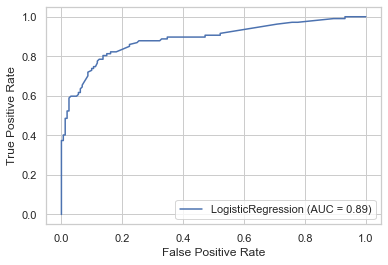

In [177]:
plot_roc_curve(logFit,X_test,y_test)

In [178]:

# from sklearn.model_selection import GridSearchCV
# parameters = {'fit_intercept':[True,False],'solver':['lbfgs','liblinear'], 'n_jobs':[-1,1,10,15]}

In [179]:
# gridSearch = GridSearchCV(logFit,parameters, cv=3)
# gridSearch.fit(X_train, y_train)


In [180]:
# gridSearch.best_estimator_

In [181]:
# grid_lr = LogisticRegression(fit_intercept=True, n_jobs=-1, solver='lbfgs')
# grid_lr.fit(X_train, y_train)
# y_pred= grid_lr.predict(X_test)
# # print("Sensitivity of model: ", sensitivityLr)
# # print("Specificity of model: ", specificityLr)
# from sklearn.metrics import r2_score
# print('R2_test: ',metrics.r2_score(y_test,y_pred))

### Summary

In [182]:
result = pd.DataFrame(data=res,columns=['DecisionTreeClassifier'],index=['Accuracy','Sensitivity','Specificity'])
result['LogisticRegression'] = [accuracy_score(y_test,pred_test_Lr),sensitivityLr,specificityLr]
result

,DecisionTreeClassifier,LogisticRegression
Accuracy,0.817164,0.832090
Sensitivity,0.626168,0.747664
Specificity,0.944099,0.888199


We can notice the difference in performance. **Logistic Regression** performed **better** in terms of **accuracy**.
Having said that, **the false positives in LogisticRegression is almost twice as high as in DecisionTreeClassifier**. I personally would prefer to have more FaLse Negatives in this case rather than having false hope.

Overall, we could see there was a substantial bias in the **passenger class** in which people travelled, and despite that ,**the men generally were less fortuante**. It was also important to note that **children, women and elderly were given preference during the rescue operation**.

That being said, this particular exercise has been good to work on, and has given me some much needed practice to reiterate my learnings.